In [19]:
%matplotlib inline
import sklearn
#import graphviz
#import sklearn.tree
import numpy as np
#from StringIO import StringIO
import matplotlib.pyplot as plt

In [10]:
col_names = "rain,hot temp.,mild temp.,High Humidity,Strong winds,playTennis"
my_tennis_data = np.array([[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0]])

In [3]:
my_tennis_data

array([[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0]])

In [11]:
### select all rows except last column
X_matrix = my_tennis_data[:, :-1] 
feature_names = np.array(col_names.split(",")[:-1])
#feature_names = ["Outlook", "Temp", "Humidity", "Wind"]
### select last column
Y = my_tennis_data[:, -1]
label_name = ["Dont play Tennis", "Play Tennis"]

In [12]:
from sklearn import neighbors
knearest_clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform') # Keep varying k by changing n_neighbors
knearest_clf.fit(X_matrix, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
print "predicted:", knearest_clf.predict(X_matrix[-2:,:])
print "truth", Y[-2:]

predicted: [1 1]
truth [1 0]


In [25]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

#Loading data for the X (We will use only one feature here)
diabetes_X = diabetes.data[:, 2]
print diabetes_X.shape

(442,)


In [26]:
diabetes_X = diabetes_X[:,np.newaxis]
print diabetes_X.shape

(442, 1)


('Coefficients:', array([ 938.23786125]))
Residual sum of squares: 2548.07
Variance score: 0.47


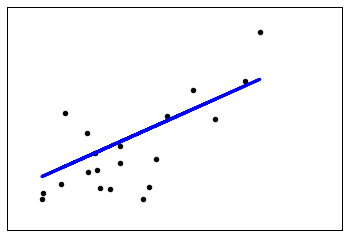

In [27]:
#Splitting training and testing data (features)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#Splitting training and testing data (target)
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Linear regression
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [17]:
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=4, weights='uniform')
knn_regression.fit(diabetes_X_train, diabetes_y_train)

print("Residual sum of squares: %.2f"
      % np.mean((knn_regression.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % knn_regression.score(diabetes_X_test, diabetes_y_test))

Residual sum of squares: 2807.74
Variance score: 0.42


In [28]:
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

logreg = linear_model.LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg.fit(X_train, y_train)
probs = logreg.predict_proba(X_test)
print probs

predicted = logreg.predict(X_test)

print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[ 0.10839577  0.40353485  0.48806938]
 [ 0.0053336   0.43570616  0.55896024]
 [ 0.90644459  0.05829804  0.03525736]
 [ 0.00378484  0.36302006  0.6331951 ]
 [ 0.78729706  0.13385282  0.07885012]
 [ 0.22629066  0.31851887  0.45519048]
 [ 0.81642242  0.11753549  0.06604209]
 [ 0.04124046  0.35879338  0.59996616]
 [ 0.00883417  0.37948209  0.61168374]
 [ 0.05266304  0.40105094  0.54628601]
 [ 0.02256388  0.4146964   0.56273972]
 [ 0.12852257  0.34723611  0.52424132]
 [ 0.05266304  0.40105094  0.54628601]
 [ 0.01906628  0.38822097  0.59271275]
 [ 0.07951798  0.39048752  0.5299945 ]
 [ 0.6861424   0.19257988  0.12127772]
 [ 0.10081343  0.39040689  0.50877968]
 [ 0.09938691  0.4303138   0.47029928]
 [ 0.66115411  0.20997991  0.12886599]
 [ 0.86503423  0.08236233  0.05260344]
 [ 0.16809436  0.39615019  0.43575545]
 [ 0.31443134  0.3351939   0.35037475]
 [ 0.81481071  0.12309655  0.06209274]
 [ 0.71236552  0.19467493  0.09295955]
 [ 0.04098338  0.39823618  0.56078044]
 [ 0.87473506  0.09013254